# Consuming Government Data 
## with Python and d3
### by Pratap Vardhan ([@PratapVardhan](https://twitter.com/PratapVardhan))

At the end of this talk you will be familiar with

- Using Pandas to read and parse data
- Find patterns, anomalies in data
- Integrate d3.js based frameworks to your data pipeline

### Code at https://github.com/pratapvardhan/pycon-2015

# Government - Who's got the data?

Why do we even care about Government's data?

Among many reasons, Calvin has a strong point to make..

![I, me, myself?](http://picayune.uclick.com/comics/ch/1991/ch910827.gif)

# Politics of Donations

![Donations?](http://picayune.uclick.com/comics/ch/1995/ch950707.gif)

# Let's read the data from database

We scraped the data from AAP donations website.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
con = sqlite3.connect("data/aapdonation.db")

In [3]:
df = pd.read_sql('SELECT * FROM aapdonate', con, parse_dates=['DATE'])

In [4]:
df.head()

,NAME,COUNTRY,STATE,TID,AMT,DATE
0,MEHNDI HASAN,INDIA,DELHI,MO115400942,10,2015-01-02 14:38:00
1,AMITABH,INDIA,DELHI,MO115400941,100,2015-01-02 14:33:00
2,RAJPAL,INDIA,DELHI,MO115400940,500,2015-01-02 14:33:00
3,SHARAD CHAUHAN,INDIA,TELANGANA,NE400939,1001,2015-01-02 14:33:00
4,MITHLESH,INDIA,UTTAR PRADESH,NE400938,1,2015-01-02 14:32:00


# Getting some context around the data

#### Total Donation Amount

In [5]:
'%.2f Crore' % (df['AMT'].sum() / 1e+7)

'81.33 Crore'

#### Total Number of Donations made

In [6]:
"{:,}".format(df['AMT'].count())

'235,948'

#### Average Amount Donated

In [7]:
"{0:.2f}".format(df['AMT'].mean())

'3446.82'

#### Single Highest Donation

In [8]:
df.ix[df['AMT'].idxmax()]

NAME       BAJAJ ELECTORAL TRUST
COUNTRY                    INDIA
STATE                MAHARASHTRA
TID                  HO414362694
AMT                        3e+07
DATE         2014-07-05 17:55:00
Name: 16467, dtype: object

#### Super-PACs - More than 1 Lakh donation

In [9]:
df[df['AMT'] > 1e+5]['AMT'].count(), '%.2f Crore' % (df[df['AMT'] > 1e+5]['AMT'].sum() / 1e+7)

(467, '26.69 Crore')

#### Using pd.describe()

In [10]:
df['AMT'].describe()

count      235948.000000
mean         3446.823151
std         77225.614901
min             1.000000
25%           101.000000
50%           500.000000
75%          2000.000000
max      30000000.000000
Name: AMT, dtype: float64

# Resample timeseries

## Month-wise donations amounts

In [11]:
df.set_index('DATE')['AMT'].resample('M', how='sum')

DATE
2012-11-30    5.335480e+05
2012-12-31    3.694378e+06
2013-01-31    8.014810e+05
2013-02-28    4.110186e+06
2013-03-31    4.870383e+06
2013-04-30    1.572727e+07
2013-05-31    7.174672e+06
2013-06-30    9.091356e+06
2013-07-31    1.532198e+07
2013-08-31    2.703926e+07
2013-09-30    4.217791e+07
2013-10-31    4.472144e+07
2013-11-30    2.511796e+07
2013-12-31    3.996024e+07
2014-01-31    4.469318e+07
2014-02-28    2.651878e+07
2014-03-31    9.424170e+07
2014-04-30    1.255169e+08
2014-05-31    4.017460e+07
2014-06-30    8.759813e+06
2014-07-31    5.081676e+07
2014-08-31    2.064085e+06
2014-09-30    1.057237e+06
2014-10-31    8.638310e+05
2014-11-30    1.107629e+07
2014-12-31    2.070332e+07
2015-01-31    9.170932e+07
2015-02-28    4.111570e+07
2015-03-31    6.057555e+06
2015-04-30    7.087900e+05
2015-05-31    1.884901e+06
2015-06-30    8.348890e+05
2015-07-31    4.131297e+06
Freq: M, Name: AMT, dtype: float64

## Month-wise - Number of donations made

In [12]:
df.set_index('DATE')['AMT'].resample('M', how='count')

DATE
2012-11-30      957
2012-12-31      237
2013-01-31      552
2013-02-28     3370
2013-03-31     1987
2013-04-30     7413
2013-05-31     4816
2013-06-30     4981
2013-07-31     8286
2013-08-31     8500
2013-09-30     9516
2013-10-31    11386
2013-11-30     9620
2013-12-31    16132
2014-01-31    23514
2014-02-28    10820
2014-03-31    27486
2014-04-30    25378
2014-05-31     5326
2014-06-30      709
2014-07-31      489
2014-08-31     1288
2014-09-30      655
2014-10-31      469
2014-11-30     6115
2014-12-31     7037
2015-01-31    21517
2015-02-28    12327
2015-03-31      807
2015-04-30      363
2015-05-31      565
2015-06-30      463
2015-07-31     2867
Freq: M, Name: AMT, dtype: int64

## Combine both operations

In [13]:
df.set_index('DATE').resample('M', how={'AMT': pd.np.sum, 'NAME': 'count'})

,AMT,NAME
DATE,,
2012-11-30,5.335480e+05,957
2012-12-31,3.694378e+06,237
2013-01-31,8.014810e+05,552
2013-02-28,4.110186e+06,3370
2013-03-31,4.870383e+06,1987
2013-04-30,1.572727e+07,7413
2013-05-31,7.174672e+06,4816
2013-06-30,9.091356e+06,4981
2013-07-31,1.532198e+07,8286


# Curse of sampling resolution
How we might miss out of sampling data points

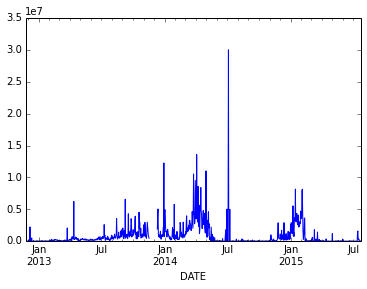

In [14]:
df.set_index('DATE')['AMT'].resample('D', how='sum').plot();

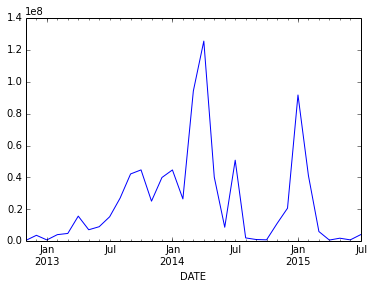

In [15]:
df.set_index('DATE')['AMT'].resample('M', how='sum').plot();

# Javascript into IPython
Injecting html, js into browser

In [16]:
from IPython.display import HTML

html = """<div id='time'></div>"""

javascript = """
<script type="text/Javascript">
(function () {
    function startTime() {
        document.getElementById('time').innerHTML = new Date();
        t = setTimeout(function () {
            startTime()}, 500);
    }
    startTime();
})();
</script>
"""
HTML(html + javascript)

## importing d3 and dimple

In [17]:
%%javascript

require.config({
    shim: {
        d3: { exports: "d3" },
        dimple: {
            exports: "dimple",
            deps: ["d3"]
        }
    },
    paths: {
        d3: "/files/js/d3.v3.min",
        dimple: "/files/js/dimple.v1.1.5.amd"
    }
});


require(["d3", "dimple"], function(d3, dimple) {
  console.log(d3.version);
  console.log(dimple.version);
});

<IPython.core.display.Javascript object>

In [18]:
%%html
<style type="text/css">
 .tooltip {opacity: 1 !Important;}   
</style>

## Let's animate a rectangle

In [19]:
html = """<div id='d3animate'></div>"""

js = """"<script type="text/Javascript">
var svg = d3.select("#d3animate")
  .append('svg')
  .attr("width", 600)
  .attr("height", 300);

var square = svg.append("rect")
  .attr("x", 30)
  .attr("y", 30)
  .attr("width", 30)
  .attr("height", 30)
  .attr("fill", "blue");

(function () {
  function d3animate() {
    square.transition()
      .attr("x", Math.random()*600)
      .attr("y", Math.random()*300)
      .duration(2000);
    setTimeout(function () { d3animate()}, 2000); }
    d3animate();
})();
</script>"""

HTML(html + js)

# Donations Tracker

location: https://gramener.com/aapdonations/

In [20]:
from IPython.display import IFrame
IFrame('https://gramener.com/aapdonations/', width=1000, height=500)

# Making of Treemaps

Get the states aggregates 

In [21]:
aap_states = (df.groupby('STATE')['AMT']
              .agg([pd.np.sum, 'count', pd.np.mean])
              .sort('count', ascending=False))
aap_states

,sum,count,mean
STATE,,,
DELHI,1.768298e+08,40565,4359.172267
MAHARASHTRA,1.481808e+08,29298,5057.710359
,2.264414e+08,28431,7964.596584
UTTAR PRADESH,5.474770e+07,24235,2259.034496
KARNATAKA,4.768724e+07,22542,2115.484207
HARYANA,3.853400e+07,13491,2856.274776
ANDHRA PRADESH,1.625470e+07,9308,1746.315428
TAMIL NADU,1.826528e+07,7843,2328.864083
PUNJAB,1.052215e+07,6915,1521.641504


## Get the country aggregates 

In [22]:
aap_countries = (df[df['COUNTRY'] != 'INDIA']
                 .groupby('COUNTRY')['AMT']
                 .agg([pd.np.sum, 'count', pd.np.mean])
                 .sort('count', ascending=False))
aap_countries

,sum,count,mean
COUNTRY,,,
UNITED STATES,75757883.00,10562,7172.683488
UNITED ARAB EMIRATES,33310691.00,2916,11423.419410
UNITED KINGDOM,13841939.00,2387,5798.885212
SINGAPORE,16435337.80,1826,9000.732640
CANADA,20303045.95,1671,12150.236954
AUSTRALIA,10889004.00,1543,7057.034349
QATAR,3251971.00,778,4179.911311
SAUDI ARABIA,2172966.00,732,2968.532787
KUWAIT,1967152.00,556,3538.043165


## Working on meta-data
Creating custom binned buckets

In [23]:
_BINS = [1, 100, 500, 1000, 5000, 10000, pd.np.inf]
pd.np.histogram(df['AMT'], bins=_BINS)[0]

array([30225, 55149, 45516, 71030, 17721, 16307])

In [24]:
df['AMT-bucket'] = pd.cut(df['AMT'], _BINS, right=False)
df.head()

,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket
0,MEHNDI HASAN,INDIA,DELHI,MO115400942,10,2015-01-02 14:38:00,"[1, 100)"
1,AMITABH,INDIA,DELHI,MO115400941,100,2015-01-02 14:33:00,"[100, 500)"
2,RAJPAL,INDIA,DELHI,MO115400940,500,2015-01-02 14:33:00,"[500, 1000)"
3,SHARAD CHAUHAN,INDIA,TELANGANA,NE400939,1001,2015-01-02 14:33:00,"[1000, 5000)"
4,MITHLESH,INDIA,UTTAR PRADESH,NE400938,1,2015-01-02 14:32:00,"[1, 100)"


In [25]:
df['STATE'] = df['STATE'].replace({u'\xa0': 'Non-Resident Indian'})
df['AMT-bucket'] = df['AMT-bucket'].astype(str)

# Denominations vs States Distributions
Understanding distributions of denominations across states

In [26]:
(df.groupby(['STATE', 'AMT-bucket'])['TID'].count())

STATE                      AMT-bucket   
ANDAMAN & NICOBAR ISLANDS  [1, 100)           45
                           [100, 500)         26
                           [1000, 5000)       16
                           [10000, inf)        1
                           [500, 1000)        20
                           [5000, 10000)       4
ANDHRA PRADESH             [1, 100)          976
                           [100, 500)       2417
                           [1000, 5000)     2953
                           [10000, inf)      406
                           [500, 1000)      2009
                           [5000, 10000)     547
ARUNACHAL PRADESH          [1, 100)           19
                           [100, 500)         22
                           [1000, 5000)       28
                           [10000, inf)        2
                           [500, 1000)        12
                           [5000, 10000)       6
ASSAM                      [1, 100)          327
                           [

# Let's use pivots
Anytime, you do a groupby and stack it, you may want to use pivots

In [27]:
pd.pivot_table(df, index='STATE', columns='AMT-bucket', values='TID', aggfunc='count')

AMT-bucket,"[1, 100)","[100, 500)","[1000, 5000)","[10000, inf)","[500, 1000)","[5000, 10000)"
STATE,,,,,,
ANDAMAN & NICOBAR ISLANDS,45,26,16,1,20,4
ANDHRA PRADESH,976,2417,2953,406,2009,547
ARUNACHAL PRADESH,19,22,28,2,12,6
ASSAM,327,484,281,17,248,37
BIHAR,1605,1925,922,65,1068,128
CHANDIGARH,159,347,483,69,290,94
CHHATTISGARH,428,658,600,86,455,92
DADRA & NAGAR HAVELI,5,12,12,NaN,28,8
DAMAN AND DIU,10,10,9,NaN,8,1


# Focus on Top-States
Filter the data via top states list

In [28]:
pd.pivot_table(df[df['STATE'].isin(aap_states.index[:10])],
               index='STATE',
               columns='AMT-bucket',
               values='TID',
               aggfunc='count')

AMT-bucket,"[1, 100)","[100, 500)","[1000, 5000)","[10000, inf)","[500, 1000)","[5000, 10000)"
STATE,,,,,,
ANDHRA PRADESH,976,2417,2953,406,2009,547
DELHI,6813,10560,10200,3298,7339,2355
HARYANA,1408,3158,4260,842,2892,931
KARNATAKA,1700,4421,8418,1161,5124,1718
MAHARASHTRA,2502,6334,9974,2115,6127,2246
PUNJAB,817,2008,1888,237,1620,345
RAJASTHAN,1334,1938,1465,153,1303,237
TAMIL NADU,645,1858,2740,272,1831,497
UTTAR PRADESH,4375,6902,5964,835,5148,1011


# Curious case of transaction IDs
Why would a same transaction ID be issued to mulitple donations/people?

In [29]:
aap_tids = df['TID'].value_counts()
aap_tids_df = df[df['TID'].isin(aap_tids[aap_tids>1].index)].sort('TID')
aap_tids_df

,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket
15000,ANIL P WILSON,INDIA,DELHI,35075,11000,2014-08-23 18:45:00,"[10000, inf)"
14999,ANIL P WILSON,INDIA,DELHI,35075,11000,2014-08-23 18:45:00,"[10000, inf)"
196139,HIMANSHU PANWAR,INDIA,KARNATAKA,4831286,1000,2013-01-12 13:44:00,"[1000, 5000)"
196140,HIMANSHU PANWAR,INDIA,KARNATAKA,4831286,1000,2013-01-12 13:44:00,"[1000, 5000)"
176595,ALKA TIWARI,INDIA,UTTAR PRADESH,7530657,1000,2013-06-14 19:23:00,"[1000, 5000)"
176593,ALKA TIWARI,INDIA,UTTAR PRADESH,7530657,1000,2013-06-14 19:25:00,"[1000, 5000)"
145680,PRATYUSH MISHRA,UNITED STATES,Non-Resident Indian,8942398,1000,2013-10-04 21:22:00,"[1000, 5000)"
145679,PRATYUSH MISHRA,UNITED STATES,Non-Resident Indian,8942398,1000,2013-10-04 21:22:00,"[1000, 5000)"
175149,TUSHAR SHAH,INDIA,MAHARASHTRA,CCA13FAAK887,1000,2013-06-21 18:44:00,"[1000, 5000)"
175262,HARISH KUMAR SHARMA,INDIA,HARYANA,CCA13FAAK887,1000,2013-06-21 11:25:00,"[1000, 5000)"


## Different people with same TIDs
The problems in 2013

In [30]:
aap_tids_drp = aap_tids_df.drop_duplicates(['NAME', 'COUNTRY', 'STATE', 'TID'])
aap_tids_drp.loc[:, 'TID_counts'] = aap_tids_drp.groupby('TID')['TID'].transform('count')
aap_tids_drp[aap_tids_drp['TID_counts']>1]

c:\Anaconda\lib\site-packages\pandas\core\indexing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\Anaconda\lib\site-packages\pandas\core\indexing.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket,TID_counts
175149,TUSHAR SHAH,INDIA,MAHARASHTRA,CCA13FAAK887,1000,2013-06-21 18:44:00,"[1000, 5000)",2
175262,HARISH KUMAR SHARMA,INDIA,HARYANA,CCA13FAAK887,1000,2013-06-21 11:25:00,"[1000, 5000)",2
175016,YASHDEEP GODHAL,INDIA,KARNATAKA,CCA13FAAL285,8000,2013-06-22 19:54:00,"[5000, 10000)",2
174859,PAWAN KUMAR SINGH,INDIA,UTTAR PRADESH,CCA13FAAL285,1000,2013-06-23 20:02:00,"[1000, 5000)",2
174617,KAUSHIK CHATTERJEE,INDIA,WEST BENGAL,CCA13FAAL729,300,2013-06-24 13:16:00,"[100, 500)",2
174057,SURESH SHRIVASTAV,INDIA,DELHI,CCA13FAAL729,10,2013-06-27 13:20:00,"[1, 100)",2
173548,SAURABH CHATTERJEE,INDIA,UTTAR PRADESH,CCA13FAAL919,2000,2013-06-29 09:26:00,"[1000, 5000)",2
174510,DHIREN MEHTA,INDIA,MAHARASHTRA,CCA13FAAL919,5000,2013-06-24 21:25:00,"[5000, 10000)",2
168003,ARVIND DEWAN,INDIA,DELHI,CCA13GAAO150,1000,2013-07-14 19:05:00,"[1000, 5000)",2
173161,ANKUR JAIN,INDIA,MAHARASHTRA,CCA13GAAO150,2000,2013-07-01 13:09:00,"[1000, 5000)",2


# Creative Namesakes

I, Narendra Modi, .. err !

In [31]:
df[df['NAME'].str.contains('NARENDRA MODI')]

,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket
7286,NARENDRA MODI,INDIA,DELHI,NI390277,11,2014-12-02 17:23:00,"[1, 100)"
7452,NARENDRA MODI,INDIA,DELHI,NI389914,1,2014-12-01 17:11:00,"[1, 100)"
14145,NARENDRA MODI,INDIA,GUJARAT,NI377864,5,2014-09-30 13:47:00,"[1, 100)"
69330,NARENDRA MODI,KENYA,Non-Resident Indian,NI250157,10,2014-03-08 02:10:00,"[1, 100)"
76668,NARENDRA MODI,INDIA,UTTAR PRADESH,NE238569,1,2014-02-26 09:45:00,"[1, 100)"
77339,NARENDRA MODI,INDIA,GUJARAT,NE237397,1,2014-02-24 19:03:00,"[1, 100)"
83636,NARENDRA MODI BJP,INDIA,GUJARAT,NE216463,10,2014-02-11 13:16:00,"[1, 100)"
90801,NARENDRA MODI,INDIA,GUJARAT,NE204305,1,2014-01-18 17:26:00,"[1, 100)"
154334,NARENDRA MODI FOR 'AAP',INDIA,MAHARASHTRA,CCAAI1ACA202,1,2013-09-06 13:18:00,"[1, 100)"
201341,NARENDRA MODI,INDIA,LAKSHADWEEP,NE432509,1,2015-01-22 14:52:00,"[1, 100)"


In [32]:
df[df['NAME'].str.contains('KEJRIWAL')]

,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket
60,ARVIND KEJRIWAL,INDIA,UTTAR PRADESH,MO115400858,10000,2015-01-02 10:57:00,"[10000, inf)"
724,BHAGODA ARVIND KEJRIWAL,INDIA,DELHI,NE399841,10,2014-12-31 06:11:00,"[1, 100)"
2706,ARUN KEJRIWAL,INDIA,DELHI,MO1214396921,500,2014-12-21 16:32:00,"[500, 1000)"
4848,SHIVESH KEJRIWAL,INDIA,DELHI,NI393881,1000,2014-12-10 20:39:00,"[1000, 5000)"
5958,VINEET KEJRIWAL,INDIA,KARNATAKA,NI392316,1001,2014-12-06 12:41:00,"[1000, 5000)"
8333,VISHAAL KEJRIWAL,INDIA,CHHATTISGARH,NI388053,2611,2014-11-27 00:04:00,"[1000, 5000)"
9911,KEJRIWAL PILES MAREEJ GADDAR,INDIA,PUNJAB,NI385440,1,2014-11-21 12:29:00,"[1, 100)"
10796,ISHQ KEJRIWAL,INDIA,DELHI,NI384172,1,2014-11-13 16:33:00,"[1, 100)"
13145,AJAY SHARMA WANT KEJRIWALFIRSE,INDIA,DELHI,NI379723,1100,2014-11-04 20:39:00,"[1000, 5000)"
15291,HAPPY BDAY ARVIND KEJRIWAL,INDIA,KARNATAKA,NI375525,16,2014-08-16 09:26:00,"[1, 100)"


In [33]:
df[df['NAME'].str.contains('OSAMA BIN LADEN')]

,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket
202147,OSAMA BIN LADEN,AFGHANISTAN,Non-Resident Indian,NE431010,1,2015-01-21 14:15:00,"[1, 100)"
221886,OSAMA BIN LADEN,INDIA,DELHI,NE472240,11,2015-02-03 11:49:00,"[1, 100)"


In [34]:
df[df['NAME'].str.contains('OBAMA')]

,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket
222627,BARACK OBAMA,UNITED STATES,Non-Resident Indian,NI470850,200,2015-02-03 00:30:00,"[100, 500)"
222756,BARACK HUSSEIN OBAMA,UNITED STATES,Non-Resident Indian,NI470552,1,2015-02-02 23:10:00,"[1, 100)"


In [35]:
df[df['NAME'].str.contains('HITLER')]

,NAME,COUNTRY,STATE,TID,AMT,DATE,AMT-bucket
230812,HITLER LOVER ARVIND KEJRIWAL,INDIA,TELANGANA,NE491473,1,2015-04-07 13:27:00,"[1, 100)"
230843,HITLER KEJARIWAL,INDIA,DELHI,NE491414,1,2015-04-05 12:20:00,"[1, 100)"
235897,HEIL HITLER,INDIA,MAHARASHTRA,NE491781,1,2015-04-14 21:22:00,"[1, 100)"
235898,HEIL HITLER,INDIA,MAHARASHTRA,NE491779,1,2015-04-14 21:11:00,"[1, 100)"


# PM Speeches

![speeches?](http://picayune.uclick.com/comics/ch/1993/ch930510.gif)

In [36]:
df = pd.read_csv('data/pmo-full-speeches-places.csv.bz2', compression='bz2')

In [37]:
df['time'] = pd.to_datetime(df['Date'])

In [38]:
df.head()

,Date,ID,Place,Speech,Title,Place1,Place2,time
0,"March 4, 2014",1441,"Nay Pyi Taw, Myanmar",I am delighted to return to this beautiful c...,PMs statement at 3rd BIMSTEC Summit,Nay Pyi Taw,Myanmar,2014-03-04
1,"May 28, 2012",1178,"Nay Pyi Taw, Myanmar",I would like to thank President U Thein Sein...,PMs speech at the banquet hosted by President ...,Nay Pyi Taw,Myanmar,2012-05-28
2,"March 1, 2014",1440,New Delhi,I am very happy to participate in the Nation...,PMs address at the National Awards Ceremony fo...,New Delhi,New Delhi,2014-03-01
3,"February 26, 2014",1439,New Delhi,Today marks a very important step forward to...,PM's speech at the foundation laying ceremony ...,New Delhi,New Delhi,2014-02-26
4,"February 21, 2014",1438,New Delhi,"""Madam Speaker, As we come to the end of the ...",PMs farewell speech to the 15th Lok Sabha,New Delhi,New Delhi,2014-02-21


## So, how many were there?

In [39]:
'Total speeches: %d, at rate of - speech every %d days' %  (df.shape[0],  (10*365.) / df.shape[0])

'Total speeches: 1198, at rate of - speech every 3 days'

In [40]:
speechs_per_year = df.groupby([lambda x: df['time'][x].year])['ID'].size()
speechs_per_year

2004     59
2005    189
2006    218
2007    148
2008    128
2009     73
2010     86
2011     86
2012     92
2013     95
2014     24
dtype: int64

In [41]:
speechs_per_year = speechs_per_year.reset_index()
speechs_per_year.columns = ['Year', 'Speeches']

In [42]:
html = """<div id="vismmscount"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#vismmscount', 400, 250), %s)
    var x = viz.addCategoryAxis("x", "Year")
    var y = viz.addMeasureAxis("y", "Speeches")
    viz.addSeries(null, dimple.plot.bar)
    viz.draw()
  })();</script>
""" % speechs_per_year.to_json(orient='records')
HTML(html)

## Resample is fast, very fast

In [43]:
%timeit df.groupby([lambda x: df['time'][x].year])['ID'].size()

10 loops, best of 3: 18.5 ms per loop


In [44]:
%timeit df.set_index('time')['ID'].resample('AS', how='count')

100 loops, best of 3: 2.56 ms per loop


In [45]:
pd.np.testing.assert_array_equal(df.set_index('time')['ID'].resample('AS', how='count'),
                                 df.groupby([lambda x: df['time'][x].year])['ID'].size())

## And, where did MMS speak?

In [46]:
df['Place2'].value_counts()[:10]

New Delhi          761
Maharashtra         35
USA                 33
Russia              19
Japan               18
Tamil Nadu          18
Jammu & Kashmir     18
Andhra Pradesh      16
South Africa        16
Assam               15
dtype: int64

In [47]:
df['Place1'].value_counts()[:10]

New Delhi     761
Mumbai         27
Tokyo          17
Washington     17
New York       15
Moscow         14
Hyderabad      12
Chennai        10
London          9
Beijing         8
dtype: int64

## How was the travel itinerary every year?

In [48]:
df.groupby([lambda x: df['time'][x].year])['Place'].agg(lambda grp: grp.nunique())

2004    10
2005    36
2006    51
2007    21
2008    35
2009    19
2010    20
2011    24
2012    19
2013    19
2014     5
Name: Place, dtype: int64

### Let's timeit!

In [49]:
%timeit df.groupby([lambda x: df['time'][x].year])['Place'].agg(lambda grp: grp.nunique())

10 loops, best of 3: 20.3 ms per loop


In [50]:
%timeit df.set_index('time').resample('AS', how={'Place': 'nunique'})

100 loops, best of 3: 6.22 ms per loop


## What's with the text?
More about network relationships: https://gramener.com/speechopedia/viewspeeches

In [51]:
df['speech_length'] = df['Speech'].str.len()
df_yr_spchlen = df.groupby([lambda x: df['time'][x].year])['speech_length'].sum()
df_yr_spchlen

2004     558840
2005    1513035
2006    1580587
2007    1027004
2008     922370
2009     531647
2010     540717
2011     543083
2012     487894
2013     503878
2014     129376
Name: speech_length, dtype: float64

In [52]:
html = """<div id="vismmsspeechlen"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#vismmsspeechlen', 400, 250), %s)
    var x = viz.addCategoryAxis("x", "index")
    var y = viz.addMeasureAxis("y", "speech_length")
    viz.addSeries(null, dimple.plot.bar)
    viz.draw()
  })();</script>
""" % df_yr_spchlen.reset_index().to_json(orient='records')
HTML(html)

# International Trade
## Exports and Imports
![trade](http://picayune.uclick.com/comics/ch/1995/ch951013.gif)

## Reading from two excel datasources

In [53]:
df_export = pd.read_excel('data/India_Exports_2011-12_And_2012-13.xls')

In [54]:
df_export.head()

,Commodity,Country,Unit,Quantity-2011-12,Value-INR-2011-12,Quantity-2012-13,Value-INR-2012-13
0,TEA,AFGHANISTAN TIS,KGS,641058,80823418,766551,92563418
1,TEA,ALGERIA,KGS,352422,40456878,35000,4028062
2,TEA,ANGOLA,KGS,11511,1638109,11,2450
3,TEA,ARGENTINA,KGS,30,5536,1607,813210
4,TEA,ARMENIA,KGS,6970,1193148,4356,1290414


In [55]:
df_import = pd.read_excel('data/India_Imports_2011-12_And_2012-13.xls')

In [56]:
df_import.head()

,Commodity,Country,Unit,Quantity-2011-12,Value-INR-2011-12,Quantity-2012-13,Value-INR-2012-13
0,WHEAT,AUSTRALIA,TON,0,0,2921,59883789
1,WHEAT,ITALY,TON,22,807480,0,0
2,WHEAT,RUSSIA,TON,0,0,23,429716
3,RICE,CANADA,TON,42,1956141,0,0
4,RICE,CHINA P RP,TON,57,3292344,0,0


## From where and to where?
Top export and import destinations

In [57]:
df_export_countries = (df_export
                       .groupby('Country')['Value-INR-2011-12']
                       .sum()
                       .order(ascending=False))
df_export_countries[:5] / 1e+9

Country
U ARAB EMTS    1722.684826
U S A          1664.743130
CHINA P RP      876.693688
SINGAPORE       803.632863
UNSPECIFIED     764.565004
Name: Value-INR-2011-12, dtype: float64

In [58]:
df_import_countries = (df_import
                       .groupby('Country')['Value-INR-2011-12']
                       .sum()
                       .order(ascending=False))
df_import_countries[:5] / 1e+9

Country
CHINA P RP     2759.986435
U ARAB EMTS    1711.266154
SWITZERLAND    1551.264312
SAUDI ARAB     1493.499918
U S A          1172.933120
Name: Value-INR-2011-12, dtype: float64

## Join the two datasets
Using pd.concat to join two series

In [59]:
df_exim_countries = pd.concat([df_export_countries, df_import_countries], axis=1)
df_exim_countries.columns = ['export_11_12', 'import_11_12']
df_exim_countries['e/i'] = df_exim_countries['export_11_12'] / df_exim_countries['import_11_12']
df_exim_countries.sort('e/i', ascending=False)

,export_11_12,import_11_12,e/i
MARTINIQUE,304201765,0.000000e+00,inf
KIRIBATI REP,58893203,0.000000e+00,inf
FR S ANT TR,855670,0.000000e+00,inf
BERMUDA,48117787,0.000000e+00,inf
VANUATU REP,127645335,0.000000e+00,inf
TONGA,37448074,0.000000e+00,inf
GIBRALTAR,13998349907,2.893931e+06,4837.140176
PACIFIC IS,1586143315,3.581640e+05,4428.539203
BAHAMAS,105614860388,1.568729e+08,673.251266
FR POLYNESIA,569670754,8.816430e+05,646.146744


## Filter countries where exports are high

In [60]:
df_exim_countries[df_exim_countries['export_11_12']>1e+11].sort('export_11_12', ascending=False)

,export_11_12,import_11_12,e/i
U ARAB EMTS,1722684826477,1.711266e+12,1.006673
U S A,1664743129673,1.172933e+12,1.419299
CHINA P RP,876693687587,2.759986e+12,0.317644
SINGAPORE,803632863320,4.073224e+11,1.972965
UNSPECIFIED,764565004286,5.018599e+10,15.234630
HONG KONG,618772346350,5.071798e+11,1.220026
NETHERLAND,439137717400,1.294779e+11,3.391603
U K,413240885916,3.662315e+11,1.128360
GERMANY,379817399877,7.809529e+11,0.486351
BELGIUM,342080841360,5.000279e+11,0.684124


## Filter using query

In [61]:
df_exim_countries.query('export_11_12 > 1e+11').sort('export_11_12', ascending=False)

,export_11_12,import_11_12,e/i
U ARAB EMTS,1722684826477,1.711266e+12,1.006673
U S A,1664743129673,1.172933e+12,1.419299
CHINA P RP,876693687587,2.759986e+12,0.317644
SINGAPORE,803632863320,4.073224e+11,1.972965
UNSPECIFIED,764565004286,5.018599e+10,15.234630
HONG KONG,618772346350,5.071798e+11,1.220026
NETHERLAND,439137717400,1.294779e+11,3.391603
U K,413240885916,3.662315e+11,1.128360
GERMANY,379817399877,7.809529e+11,0.486351
BELGIUM,342080841360,5.000279e+11,0.684124


In [62]:
df_trade = df_exim_countries.query('export_11_12 > 2e+11').sort('export_11_12', ascending=False).reset_index()
df_trade.columns = ['Country', 'Exports', 'Imports', 'ei']
df_trade = df_trade[['Country', 'Exports', 'Imports']]

## Compare imports and exports

In [63]:
df_trade_melt = pd.melt(df_trade, id_vars=['Country'],
                        var_name='Transaction', value_name='Value')
df_trade_melt[:5]

,Country,Transaction,Value
0,U ARAB EMTS,Exports,1.722685e+12
1,U S A,Exports,1.664743e+12
2,CHINA P RP,Exports,8.766937e+11
3,SINGAPORE,Exports,8.036329e+11
4,UNSPECIFIED,Exports,7.645650e+11


In [64]:
html = """<div id="vistrade"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#vistrade', 400, 300), %s)
    viz.setBounds(60, 30, 310, 205)
    var x = viz.addCategoryAxis("x", "Country")
    var y = viz.addMeasureAxis("y", "Value")
    viz.addSeries("Transaction", dimple.plot.bar)
    viz.addLegend(60, 10, 310, 20, "right");
    viz.draw()
  })();</script>
""" % df_trade_melt.to_json(orient='records')
HTML(html)

## Most traded commodities

In [65]:
df_export_commodity = (df_export.groupby('Commodity')['Value-INR-2011-12']
                       .sum().order(ascending=False))
df_import_commodity = (df_import.groupby('Commodity')['Value-INR-2011-12']
                       .sum().order(ascending=False))
df_exim_commodity = pd.concat([df_export_commodity, df_import_commodity], axis=1)
df_exim_commodity.columns = ['export_11_12', 'import_11_12']
df_exim_commodity

,export_11_12,import_11_12
ALUMINIUM OTHR THAN PRDCTS,3.280404e+10,NaN
"ARTFCL RESNS,PLSTC MATRLS,ETC.",NaN,3.613384e+11
CARPET(EXCL. SILK) HANDMADE,4.051213e+10,NaN
CASHEW,4.390679e+10,NaN
CASHEW NUT SHELL LIQUID,5.946378e+08,NaN
CASHEW SHELLED,NaN,4.278681e+08
CASTOR OIL,4.571666e+10,NaN
CEMENT,NaN,3.795838e+09
CEREAL PREPARATION,NaN,3.168938e+09
CHEMICAL MATRL & PRODCTS,NaN,1.659541e+11


## Commodities we export and import too

In [66]:
df_exim_too = df_exim_commodity[df_exim_commodity.notnull().all(axis=1)].sort('import_11_12', ascending=False)
df_exim_too

,export_11_12,import_11_12
"PETROLEUM, CRUDE & PRODUCTS",2.679148e+12,7.430749e+12
ELECTRONIC GOODS,4.241872e+11,1.565036e+12
TRANSPORT EQUIPMENTS,1.013114e+12,6.747365e+11
OTHER COMMODITIES,8.936600e+11,6.663024e+11
PROJECT GOODS,3.963124e+09,4.222114e+11
NON-FERROUS METALS,1.741781e+11,2.342822e+11
MANUFACTURES OF METALS,4.591916e+11,2.042260e+11
MACHINE TOOLS,1.739616e+10,1.431089e+11
PULSES,1.065842e+10,8.931240e+10
COMP.SOFTWARE IN PHYSICAL FORM,2.559013e+10,7.376472e+10


## We import Wheat?

In [67]:
df_exim_too = df_exim_too.reset_index()
df_exim_too.columns = ['Commodity', 'Exports', 'Imports']

In [68]:
df_trade_melt = pd.melt(df_exim_too, id_vars=['Commodity'],
                        var_name='Transaction', value_name='Value')
df_trade_melt[:5]

,Commodity,Transaction,Value
0,"PETROLEUM, CRUDE & PRODUCTS",Exports,2.679148e+12
1,ELECTRONIC GOODS,Exports,4.241872e+11
2,TRANSPORT EQUIPMENTS,Exports,1.013114e+12
3,OTHER COMMODITIES,Exports,8.936600e+11
4,PROJECT GOODS,Exports,3.963124e+09


In [69]:
html = """<div id="viscommtoo"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#viscommtoo', 400, 300), %s)
    viz.setBounds(200, 30, 300, 220)
    var y = viz.addCategoryAxis("y", "Commodity")
    var x = viz.addMeasureAxis("x", "Value")
    viz.addSeries("Transaction", dimple.plot.bar)
    viz.addLegend(60, 10, 290, 20, "right");
    viz.draw()
  })();</script>
""" % df_trade_melt.to_json(orient='records')
HTML(html)

# Crops production and area under use

![crops](http://www.thehindu.com/multimedia/dynamic/01184/21TH_CARTOON_COLOU_1184011f.jpg)

In [70]:
df = pd.read_csv('data/crops.csv')

In [71]:
df.head()

,Year,State,District,Crop,Season,Area(in Hectares),Production(in Tonnes)
0,1998,ANDHRA PRADESH,ADILABAD,Arhar,Kharif,35900,12700
1,1998,ANDHRA PRADESH,ADILABAD,Arhar,Rabi,100,100
2,1998,ANDHRA PRADESH,ADILABAD,Bajra,Rabi,300,100
3,1998,ANDHRA PRADESH,ADILABAD,Castor seed,Kharif,2100,400
4,1998,ANDHRA PRADESH,ADILABAD,Cotton(lint),Kharif,162100,154400


## Year-wise production and Area under use

In [72]:
df.groupby('Year').agg({'Area(in Hectares)':pd.np.sum,
                        'Production(in Tonnes)':pd.np.sum})

,Area(in Hectares),Production(in Tonnes)
Year,,
1998,7.759803e+07,2.493578e+08
1999,1.631665e+08,5.935077e+08
2000,1.608854e+08,5.750794e+08
2001,1.649375e+08,5.937290e+08
2002,1.577365e+08,5.599899e+08
2003,1.699302e+08,5.795049e+08
2004,1.579122e+08,5.257947e+08
2005,1.634477e+08,5.877732e+08
2006,1.470311e+08,5.692441e+08


## Get Production per Area

In [73]:
def func(grp):
    prod = grp['Production(in Tonnes)'].sum()
    area = grp['Area(in Hectares)'].sum()
    pa = prod / area
    return pd.Series([prod, area, pa], index=['Production', 'Area', 'P/A'])

df.groupby('Year').apply(func)

,Production,Area,P/A
Year,,,
1998,2.493578e+08,7.759803e+07,3.213456
1999,5.935077e+08,1.631665e+08,3.637437
2000,5.750794e+08,1.608854e+08,3.574466
2001,5.937290e+08,1.649375e+08,3.599721
2002,5.599899e+08,1.577365e+08,3.550161
2003,5.795049e+08,1.699302e+08,3.410252
2004,5.257947e+08,1.579122e+08,3.329665
2005,5.877732e+08,1.634477e+08,3.596094
2006,5.692441e+08,1.470311e+08,3.871591


## Year-wise how many crops were grown?
Ah, what the data!

In [74]:
df.groupby('Year').apply(lambda x: x['Crop'].nunique())

Year
1998     56
1999     60
2000     61
2001     61
2002    106
2003    103
2004     52
2005     52
2006     52
2007     53
2008     52
2009     52
2010     50
dtype: int64

## Investigate with pivots

In [75]:
pd.pivot_table(df,
               index='Year',
               columns='State',
               values='Area(in Hectares)',
               aggfunc=pd.np.sum)

State,A & N ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,D & N HAVELI,DELHI,GOA,...,ORISSA,PONDICHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARANCHAL,WEST BENGAL
Year,,,,,,,,,,,,,,,,,,,,,
1998,NaN,12009600,210583,3361339,9030421,1677,NaN,NaN,50757,70208,...,5231284,NaN,6879800,NaN,85808,12253211,NaN,NaN,NaN,NaN
1999,NaN,11103293,235000,3558069,5148840,1526,NaN,23020,53387,68294,...,5898016,38842,6914400,18059277,78551,6448859,250589,23798522,NaN,8381286.000
2000,44518.000,12297290,227056,3535814,7739977,1226,5225709,26772,48466,69759,...,5811364,62402,6897600,14760465,86049,5116860,262299,23496371,1141089,7866791.000
2001,41163.000,11401347,228400,3379953,7544751,1220,5486626,26509,44616,60495,...,6011230,35454,6914100,19050259,94418,4321672,265968,23675326,1141118,8102441.000
2002,45146.300,11088892,206424,3431395,7691154,1133,5340586,26873,37439,61926,...,5563606,32452,6850100,11718390,113600,4659001,288097,22909238,1129317,8220729.000
2003,44713.110,11885979,230906,3416687,7836580,896,5595611,26676,37126,65858,...,6026766,34077,6987500,18197037,102105,4760907,275374,23639115,1140212,8447392.000
2004,45218.468,11251161,198041,3031464,7076357,770,5589104,26016,38525,82497,...,5816489,35484,7197500,12803458,81230,4869811,NaN,21664689,1146745,8196802.874
2005,37797.510,12005581,203148,3249192,7149893,695,5659431,24269,36971,82352,...,10402050,32827,7039300,18499939,81320,5047435,NaN,21066195,1131215,8171336.000
2006,37266.900,11412104,248290,2996381,7012875,684,5518699,NaN,36508,81493,...,5067436,NaN,6523400,17469525,83180,5032937,275774,23781592,1129961,8242863.000


## Crop-wise production and area under use

In [76]:
def func(grp):
    prod = grp['Production(in Tonnes)'].sum()
    area = grp['Area(in Hectares)'].sum()
    pa = prod / area
    return pd.Series([prod, area, pa], index=['Production', 'Area', 'P/A (Tonnes/Hectares)'])

df_crops = (df.groupby('Crop').apply(func)
            .sort('Area', ascending=False))
df_crops[:8]

,Production,Area,P/A (Tonnes/Hectares)
Crop,,,
Rice,1.040557e+09,5.030033e+08,2.068689
Wheat,8.653548e+08,3.070958e+08,2.817866
Bajra,9.153641e+07,1.060251e+08,0.863346
Cotton(lint),1.914491e+08,1.028227e+08,1.861935
Jowar,7.765506e+07,9.544932e+07,0.813574
Maize,1.621410e+08,7.892917e+07,2.054259
Groundnut,8.266105e+07,7.612808e+07,1.085816
Soyabean,7.368839e+07,7.359253e+07,1.001303


In [77]:
html = """<div id="viscrops"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#viscrops', 400, 300), %s)
    viz.setBounds(50, 50, 310, 205)
    var x = viz.addMeasureAxis("x", "Production")
    var y = viz.addMeasureAxis("y", "Area")
    var z = viz.addMeasureAxis("z", "P\\/A (Tonnes\\/Hectares)")
    viz.addSeries(["Crop"], dimple.plot.bubble);
    viz.addLegend(5, 5, 380, 50, "right");
    viz.draw()
  })();</script>
""" % df_crops[:10].reset_index().to_json(orient='records')
HTML(html)

## Diversified states year-wise

In [78]:
df_crops_year = (df.groupby(['Year', 'State'])
                 .apply(lambda x: x['Crop'].nunique())
                 .order(ascending=False))
df_crops_year[:10]

Year  State                         
2003  TAMIL NADU                        72
2002  TAMIL NADU                        72
      ANDHRA PRADESH                    58
2003  ANDHRA PRADESH                    57
      MADHYA PRADESH                    56
2002  KARNATAKA                         54
2003  KARNATAKA                         50
2002  MADHYA PRADESH                    48
2003  RAJASTHAN                         47
2002  RAJASTHAN                         44
dtype: int64

In [79]:
html = """<div id="viscropstime"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#viscropstime', 400, 300), %s)
    viz.setBounds(50, 50, 310, 175)
    var x = viz.addCategoryAxis("x", "State")
    var y = viz.addMeasureAxis("y", "0")
    viz.addSeries(null, dimple.plot.bar);
    viz.addLegend(5, 5, 310, 50, "right");
    viz.setStoryboard("Year");
    viz.draw()
  })();</script>
""" % df_crops_year.reset_index().to_json(orient='records')
HTML(html)

## Popular crops

In [80]:
def func(grp):
    prod = grp['Production(in Tonnes)'].sum()
    area = grp['Area(in Hectares)'].sum()
    pa = prod / area
    uni_crops = grp['Crop'].nunique()
    pop_crops_p = grp.groupby('Crop')['Production(in Tonnes)'].sum()
    pop_crop_p = (pop_crops_p.idxmax(), 100. * pop_crops_p.max() / prod)
    pop_crops_a = grp.groupby('Crop')['Area(in Hectares)'].sum()
    pop_crop_a = (pop_crops_a.idxmax(), 100. * pop_crops_a.max() / area)
    return pd.Series([prod, area, pa, uni_crops, pop_crop_p, pop_crop_a],
                     index=['Production', 'Area', 'P/A(Ton/Hect)',
                            'UniqueCrops', 'Pop-Crop-by-Production', 'Pop-Crop-by-Area'])

(df.groupby('State')
 .apply(func)
 .sort('Area', ascending=False))

,Production,Area,P/A(Ton/Hect),UniqueCrops,Pop-Crop-by-Production,Pop-Crop-by-Area
State,,,,,,
UTTAR PRADESH,2.085693e+09,2.766487e+08,7.539138,39,"(Sugarcane, 68.5889800956)","(Wheat, 40.5089499629)"
MAHARASHTRA,7.545623e+08,2.091559e+08,3.607655,31,"(Sugarcane, 73.0082563642)","(Jowar, 22.0274777201)"
RAJASTHAN,2.026653e+08,1.939487e+08,1.044943,51,"(Wheat, 34.731761808)","(Bajra, 27.2368611899)"
MADHYA PRADESH,2.092587e+08,1.716295e+08,1.219247,59,"(Wheat, 28.3256510069)","(Soyabean, 24.0901921713)"
ANDHRA PRADESH,2.610917e+09,1.401970e+08,18.623207,65,"(Coconut ('000 Nuts), 81.4377158989)","(Rice, 32.1355865044)"
KARNATAKA,4.463218e+08,1.350814e+08,3.304095,57,"(Sugarcane, 57.2060945633)","(Jowar, 14.5592086076)"
GUJARAT,3.709251e+08,1.203633e+08,3.081714,32,"(Sugarcane, 36.1742503932)","(Cotton(lint), 21.5940446554)"
WEST BENGAL,3.787771e+08,9.023905e+07,4.197485,41,"(Rice, 41.3545991474)","(Rice, 69.9249518818)"
PUNJAB,3.886983e+08,8.755390e+07,4.439532,22,"(Wheat, 48.796971214)","(Wheat, 49.2747895868)"


## Popular crops by year

In [81]:
df.groupby(['State', 'Year']).apply(func)

Production          Area  \
State                          Year                               
A & N ISLANDS                  2000  1.499140e+05     44518.000   
                               2001  1.283800e+05     41163.000   
                               2002  1.614174e+05     45146.300   
                               2003  1.516589e+05     44713.110   
                               2004  1.435810e+05     45218.468   
                               2005  1.263049e+05     37797.510   
                               2006  1.386727e+05     37266.900   
                               2007  1.327050e+05     38754.080   
                               2008  1.279720e+05     66007.000   
                               2009  1.314886e+05     67267.900   
ANDHRA PRADESH                 1998  3.666970e+07  12009600.000   
                               1999  3.614376e+07  11103293.000   
                               2000  4.139038e+07  12297290.000   
                               2001  4.037832e+07  11401347.000   
                               2002  3.656567e+07  11088892.000   
                               2003  4.082917e+07  11885979.000   
                               2004  3.808856e+07  11251161.000   
                               2005  4.324341e+07  12005581.000   
                               2006  4.653801e+07  11412104.000   
                               2007  5.081135e+07  12028443.000   
                               2008  1.015251e+09  12499189.000   
                               2009  1.185008e+09  11214083.000   
ARUNACHAL PRADESH              1998  2.859800e+05    210583.000   
                               1999  3.325350e+05    235000.000   
                               2000  3.329420e+05    227056.000   
                               2001  3.405550e+05    228400.000   
                               2002  2.955920e+05    206424.000   
                               2003  3.587950e+05    230906.000   
                               2004  2.969220e+05    198041.000   
                               2005  3.162270e+05    203148.000   
...                                           ...           ...   
UTTAR PRADESH                  2002  1.707798e+08  22909238.000   
                               2003  1.725973e+08  23639115.000   
                               2004  1.712097e+08  21664689.000   
                               2005  1.754182e+08  21066195.000   
                               2006  1.875004e+08  23781592.000   
                               2007  1.794036e+08  22784355.000   
                               2008  1.682450e+08  23471644.000   
                               2009  1.755261e+08  22955612.000   
                               2010  1.823446e+08  23406030.000   
UTTARANCHAL                    2000  8.805925e+06   1141089.000   
                               2001  8.921338e+06   1141118.000   
                               2002  9.228277e+06   1129317.000   
                               2003  8.978043e+06   1140212.000   
                               2004  8.328335e+06   1146745.000   
                               2005  8.489335e+06   1131215.000   
                               2006  9.201665e+06   1129961.000   
                               2007  9.496947e+06   1116471.000   
                               2008  7.565782e+06   1112611.000   
                               2009  8.044107e+06   1082969.000   
WEST BENGAL                    1999  3.256092e+07   8381286.000   
                               2000  3.149014e+07   7866791.000   
                               2001  3.621280e+07   8102441.000   
                               2002  3.434280e+07   8220729.000   
                               2003  3.606836e+07   8447392.000   
                               2004  3.318607e+07   8196802.874   
                               2005  3.361966e+07   8171336.000   
                               2006  3.206304e+07   8242863.000   
                   

In [82]:
"""
scatter plot x=p y=a size=p/a color states

district map with total area/ production, p/a ratio, number of unique crops,
    coastlines less crops, more volumes.
"""

'\nscatter plot x=p y=a size=p/a color states\n\ndistrict map with total area/ production, p/a ratio, number of unique crops,\n    coastlines less crops, more volumes.\n'

## Rains

![rains](http://picayune.uclick.com/comics/ch/1988/ch880912.gif)

## Read data since 1951

In [83]:
df = pd.read_excel('data/Area_Weighted_Monthly_Seasonal_And_Annual_Rainfall.xls')

In [84]:
df.head()

,Sub-Division,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,March-May,June-Sept,Oct-Dec
0,ANDAMAN and NICOBAR ISLANDS,1951,82.7,7.2,0.0,45.4,259.0,619.9,665.3,101.3,360.9,489.0,209.6,434.8,3275.1,89.9,304.4,1747.4,1133.4
1,ARUNACHAL PRADESH,1951,31.8,65.3,309.9,441.0,344.5,757.8,554.7,278.5,383.7,101.8,46.2,39.1,3354.3,97.1,1095.4,1974.7,187.1
2,ASSAM & MEGHALAYA,1951,4.5,2.9,54.6,230.0,270.6,688.4,665.9,444.4,241.5,302.2,46.3,5.4,2956.7,7.4,555.2,2040.2,353.9
3,"NAGALAND, MANIPUR, MIZORAM, TRIPURA",1951,3.9,0.2,62.4,360.1,233.7,495.0,436.2,440.5,191.1,310.6,54.9,20.8,2609.4,4.1,656.2,1562.8,386.3
4,SUB-HIMALAYAN WEST BENGAL & SIKKIM,1951,1.0,0.5,22.7,69.3,239.8,546.5,778.3,503.7,326.1,158.0,37.3,0.0,2683.2,1.5,331.8,2154.6,195.3


## Annual year-wise rainfall
Shows missing data for few years

In [85]:
rain_sd_yr = (pd.pivot_table(df,
                             index='YEAR',
                             columns='Sub-Division',
                             values='ANNUAL',
                             aggfunc=pd.np.sum))
rain_sd_yr

Sub-Division,ANDAMAN and NICOBAR ISLANDS,ARUNACHAL PRADESH,ASSAM & MEGHALAYA,BIHAR,CHHATTISGARH,COASTAL ANDHRA PRADESH,COASTAL KARNATAKA,EAST MADHYA PRADESH,EAST RAJASTHAN,EAST U.P.,...,SAURASHTRA & KUTCH,SOUTH INTERIOR KARNATAKA,SUB-HIMALAYAN WEST BENGAL & SIKKIM,TAMILNADU & PONDICHERRY,TELANGANA,UTTARAKHAND,VIDARBHA,WEST MADHYA PRADESH,WEST RAJASTHAN,WEST U.P.
YEAR,,,,,,,,,,,,,,,,,,,,,
1951,3275.1,3354.3,2956.7,849.4,1399.9,875.7,3124.3,1175.4,365.6,752.6,...,292.9,925.9,2683.2,855.0,836.5,1171.4,1082.2,649.7,179.9,724.9
1952,3079.9,2396.1,3114.0,1206.5,1374.0,850.6,2896.6,1155.4,701.7,936.0,...,412.5,872.6,3270.9,716.2,711.1,1474.6,807.8,829.3,267.2,875.3
1953,2722.0,NaN,2763.8,1376.7,1380.9,933.2,3463.3,1007.0,580.7,1266.8,...,715.1,1255.8,2594.0,968.0,1120.8,1559.4,1137.8,793.7,304.3,762.4
1954,3449.0,NaN,3131.8,1050.1,1193.4,1068.6,3821.6,1076.5,655.1,969.7,...,617.0,1032.7,3055.7,1016.3,908.8,1858.6,1100.4,1100.5,250.5,877.9
1955,3349.6,NaN,3021.7,1242.5,1436.8,1167.5,3552.5,1420.9,833.9,1424.3,...,383.1,1003.6,2992.8,1060.6,1129.5,1662.0,1368.7,1149.2,391.3,1059.5
1956,3079.9,NaN,3119.6,1492.8,1563.4,1345.3,3856.4,1515.9,923.8,1254.1,...,760.5,1243.2,2885.4,989.8,1153.2,1938.4,1124.6,1065.8,374.1,1060.2
1957,2512.7,NaN,2387.6,966.0,1218.0,935.3,3174.8,1000.8,665.1,955.7,...,417.4,1066.3,2225.5,867.0,898.5,1776.3,1071.0,833.0,267.3,1004.7
1958,2807.4,5063.5,2828.9,1163.3,1504.0,1294.7,3687.5,1171.5,735.9,1016.9,...,573.4,1210.1,2820.2,852.5,1051.9,1495.6,1172.1,1099.7,264.1,1169.7
1959,3343.4,4195.5,2640.2,1179.7,1540.5,967.8,4330.9,1302.2,776.7,869.2,...,1040.3,1277.6,2580.2,894.3,1111.4,1738.8,1606.3,1181.5,335.4,769.3


## Highly unpredictable places
volatality measure

In [86]:
# volatality aka standard deviation
rain_sd_stds = rain_sd_yr.fillna(method='ffill').std().order()
rain_sd_stds

Sub-Division
WEST RAJASTHAN                         102.542891
RAYALASEEMA                            129.050641
NORTH INTERIOR KARNATAKA               132.323640
MADHYA MAHARASHTRA                     137.918216
HAR. CHD & DELHI                       138.987574
EAST RAJASTHAN                         143.846114
PUNJAB                                 158.166328
SOUTH INTERIOR KARNATAKA               162.838690
WEST MADHYA PRADESH                    169.673340
TELANGANA                              177.296091
TAMILNADU & PONDICHERRY                178.674146
COASTAL ANDHRA PRADESH                 181.857789
MARATHWADA                             182.410248
BIHAR                                  189.661427
WEST U.P.                              190.532158
VIDARBHA                               194.380585
EAST U.P.                              196.890201
EAST MADHYA PRADESH                    205.013587
CHHATTISGARH                           206.546187
JHARKHAND                            

## Visualise most volatile places with non-volatile ones

In [87]:
df_vola = pd.melt(rain_sd_yr[rain_sd_stds.index[:3] | rain_sd_stds.index[-3:]].reset_index(),
                  id_vars=['YEAR'])
html = """<div id="visrainvola"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#visrainvola', 400, 300), %s)
    viz.setBounds(30, 30, 350, 205)
    var x = viz.addCategoryAxis("x", "YEAR")
    var y = viz.addMeasureAxis("y", "value")
    viz.addSeries("Sub-Division", dimple.plot.line)
    viz.addLegend(20, 10, 350, 20, "right");
    viz.draw()
  })();</script>
""" % df_vola.fillna(method='ffill').to_json(orient='records')
HTML(html)

In [88]:
html = """<div id="visrainvolabar"></div><script type="text/javascript">
  (function () {
    var viz = new dimple.chart(dimple.newSvg('#visrainvolabar', 400, 300), %s)
    viz.setBounds(30, 30, 350, 205)
    var x = viz.addCategoryAxis("x", "YEAR")
    var y = viz.addMeasureAxis("y", "value")
    viz.addSeries("Sub-Division", dimple.plot.bar)
    viz.addLegend(20, 10, 350, 20, "right");
    viz.draw()
  })();</script>
""" % df_vola.fillna(method='ffill').to_json(orient='records')
HTML(html)

## Interpolate missing values
using linear method

In [89]:
(rain_sd_yr
 .interpolate(method='linear') #.fillna(rain_sd_yr.mean())
 .diff()
) 

Sub-Division,ANDAMAN and NICOBAR ISLANDS,ARUNACHAL PRADESH,ASSAM & MEGHALAYA,BIHAR,CHHATTISGARH,COASTAL ANDHRA PRADESH,COASTAL KARNATAKA,EAST MADHYA PRADESH,EAST RAJASTHAN,EAST U.P.,...,SAURASHTRA & KUTCH,SOUTH INTERIOR KARNATAKA,SUB-HIMALAYAN WEST BENGAL & SIKKIM,TAMILNADU & PONDICHERRY,TELANGANA,UTTARAKHAND,VIDARBHA,WEST MADHYA PRADESH,WEST RAJASTHAN,WEST U.P.
YEAR,,,,,,,,,,,,,,,,,,,,,
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,-195.2,-958.200000,157.3,357.1,-25.9,-25.1,-227.7,-20.0,336.1,183.4,...,119.6,-53.3,587.7,-138.8,-125.4,303.2,-274.4,179.60,87.3,150.4
1953,-357.9,444.566667,-350.2,170.2,6.9,82.6,566.7,-148.4,-121.0,330.8,...,302.6,383.2,-676.9,251.8,409.7,84.8,330.0,-35.60,37.1,-112.9
1954,727.0,444.566667,368.0,-326.6,-187.5,135.4,358.3,69.5,74.4,-297.1,...,-98.1,-223.1,461.7,48.3,-212.0,299.2,-37.4,306.80,-53.8,115.5
1955,-99.4,444.566667,-110.1,192.4,243.4,98.9,-269.1,344.4,178.8,454.6,...,-233.9,-29.1,-62.9,44.3,220.7,-196.6,268.3,48.70,140.8,181.6
1956,-269.7,444.566667,97.9,250.3,126.6,177.8,303.9,95.0,89.9,-170.2,...,377.4,239.6,-107.4,-70.8,23.7,276.4,-244.1,-83.40,-17.2,0.7
1957,-567.2,444.566667,-732.0,-526.8,-345.4,-410.0,-681.6,-515.1,-258.7,-298.4,...,-343.1,-176.9,-659.9,-122.8,-254.7,-162.1,-53.6,-232.80,-106.8,-55.5
1958,294.7,444.566667,441.3,197.3,286.0,359.4,512.7,170.7,70.8,61.2,...,156.0,143.8,594.7,-14.5,153.4,-280.7,101.1,266.70,-3.2,165.0
1959,536.0,-868.000000,-188.7,16.4,36.5,-326.9,643.4,130.7,40.8,-147.7,...,466.9,67.5,-240.0,41.8,59.5,243.2,434.2,81.80,71.3,-400.4



## Changing seasons over the years
Every divsion vs years - month with highest rainfall

In [90]:
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

df_max_month = (df[months]
                .apply(lambda x: pd.Series([x.max(), x.idxmax()],
                                           index=['mvalue', 'mmonth']),
                       axis=1))

df_maxs = df[['Sub-Division', 'YEAR']]
df_maxs = df_maxs.join(df_max_month[['mvalue', 'mmonth']])
df_maxs

,Sub-Division,YEAR,mvalue,mmonth
0,ANDAMAN and NICOBAR ISLANDS,1951,665.3,JUL
1,ARUNACHAL PRADESH,1951,757.8,JUN
2,ASSAM & MEGHALAYA,1951,688.4,JUN
3,"NAGALAND, MANIPUR, MIZORAM, TRIPURA",1951,495.0,JUN
4,SUB-HIMALAYAN WEST BENGAL & SIKKIM,1951,778.3,JUL
5,GANGETIC WEST BENGAL,1951,260.3,AUG
6,ORISSA,1951,349.5,AUG
7,JHARKHAND,1951,267.0,AUG
8,BIHAR,1951,307.3,JUL
9,EAST U.P.,1951,247.4,AUG


## Using pivot
for month

In [91]:
df_maxs.pivot(index='Sub-Division', columns='YEAR', values='mmonth')

YEAR,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Sub-Division,,,,,,,,,,,,,,,,,,,,,
ANDAMAN and NICOBAR ISLANDS,JUL,JUN,JUN,SEP,MAY,MAY,JUN,JUN,JUL,JUN,...,JUL,JUN,JUN,SEP,SEP,MAY,JUN,AUG,SEP,SEP
ARUNACHAL PRADESH,JUN,AUG,JUL,NaN,NaN,NaN,JUL,AUG,JUL,JUL,...,JUL,JUL,JUL,JUL,JUL,AUG,JUL,JUL,JUL,JUN
ASSAM & MEGHALAYA,JUN,JUL,JUL,JUN,JUL,JUN,JUN,AUG,JUN,JUL,...,JUN,JUL,AUG,JUN,JUL,AUG,AUG,JUN,JUL,JUN
BIHAR,JUL,SEP,JUL,JUL,JUL,SEP,JUL,AUG,AUG,JUL,...,JUL,JUL,AUG,JUL,JUL,JUL,AUG,JUL,AUG,JUL
CHHATTISGARH,AUG,JUL,AUG,AUG,AUG,JUL,JUL,JUL,AUG,AUG,...,AUG,JUL,JUL,AUG,AUG,AUG,JUL,JUL,SEP,AUG
COASTAL ANDHRA PRADESH,JUL,OCT,OCT,OCT,OCT,OCT,AUG,OCT,JUL,SEP,...,OCT,OCT,OCT,OCT,JUN,AUG,NOV,JUL,AUG,NOV
COASTAL KARNATAKA,JUL,JUN,JUL,JUL,JUN,JUL,JUL,JUL,JUL,JUL,...,JUN,JUN,JUL,JUL,JUN,JUN,JUL,JUL,JUL,AUG
EAST MADHYA PRADESH,AUG,AUG,JUL,SEP,AUG,JUL,AUG,JUL,JUL,AUG,...,SEP,AUG,JUL,JUL,JUL,JUN,JUL,JUL,JUL,JUL
EAST RAJASTHAN,AUG,JUL,AUG,JUL,AUG,JUL,JUL,JUL,JUL,AUG,...,JUL,AUG,JUL,AUG,JUL,AUG,JUL,AUG,AUG,AUG


## Using pivot
for value fill

In [92]:
df_maxs.pivot(index='Sub-Division', columns='YEAR', values='mvalue')

YEAR,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Sub-Division,,,,,,,,,,,,,,,,,,,,,
ANDAMAN and NICOBAR ISLANDS,665.3,657.7,549.9,763.8,663.6,491.8,727.8,530.7,817.1,541.5,...,473.8,527.6,471.0,550.3,486.5,547.0,620.0,550.0,770.9,886.4
ARUNACHAL PRADESH,757.8,481.1,512.5,NaN,NaN,NaN,1219.4,1664.6,1137.7,1296.8,...,660.9,727.1,594.6,417.5,587.9,586.8,485.3,426.0,553.5,525.8
ASSAM & MEGHALAYA,688.4,662.5,529.0,698.6,651.2,880.5,502.2,635.8,580.0,643.3,...,601.7,956.8,445.4,399.3,534.5,501.1,457.2,485.8,399.6,651.0
BIHAR,307.3,297.9,430.1,364.8,504.3,360.0,334.2,449.4,264.6,357.9,...,360.0,418.4,336.7,298.1,504.4,426.3,319.1,277.2,299.3,297.8
CHHATTISGARH,462.2,432.5,487.4,357.6,404.9,472.6,441.7,500.7,468.3,428.1,...,463.0,382.1,351.5,438.6,321.8,320.9,431.5,397.3,381.7,424.8
COASTAL ANDHRA PRADESH,223.3,205.9,286.0,283.1,280.2,337.6,229.6,387.7,213.0,273.5,...,233.3,200.2,386.7,218.9,257.8,228.1,168.2,272.5,198.7,240.3
COASTAL KARNATAKA,1083.4,912.1,1630.1,1357.4,962.7,1155.8,1101.1,1253.7,1727.0,1053.2,...,973.8,861.0,1127.2,1036.2,1047.7,866.9,1645.9,1286.5,1154.8,1118.2
EAST MADHYA PRADESH,382.4,400.3,408.3,332.0,427.1,525.3,359.5,435.8,437.8,495.3,...,493.3,369.1,651.7,425.0,257.5,296.8,337.9,366.5,317.7,398.0
EAST RAJASTHAN,158.0,349.3,269.2,251.9,357.1,438.6,246.3,287.1,250.1,331.1,...,317.1,408.5,272.5,319.7,228.9,171.2,207.2,284.1,310.8,363.9


## Telling data stories

In [93]:
IFrame('https://gramener.com/playground/secc/', width=1000, height=600)